In [269]:
import torch
import numpy as np

In [270]:
x = np.random.uniform(size=[5])

In [ ]:
x
# A derivative tells you how much a given quantity changes when you slightly vary some other quantity.

In [418]:
%matplotlib inline
from matplotlib import pyplot
from math import *

In [419]:
def computeY(X, sigma) :
    Z = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( - (X)**2 / (2 * sigma**2))
    return torch.cos(2 * np.pi * X) + Z

In [420]:
def getData(N, sigma):
    np.random.seed(40)
    X = torch.tensor(np.random.uniform(low=0,high=1.0,size=N))
    Y = computeY(X, sigma)
    return X, Y

In [421]:
X, Y = getData(20, 1)

In [422]:
X.mean()

tensor(0.5274, dtype=torch.float64)

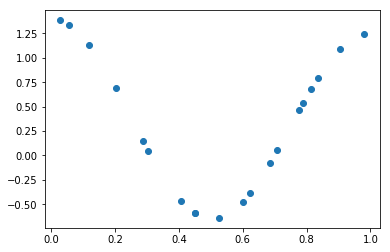

In [433]:
pyplot.plot(X,Y,"o")
pyplot.show()

In [342]:
# The bias b is absorbed into theta as b(knot) and 1 is absorbed into X as X(knot)
torch.manual_seed(40)
theta = torch.randn(3,1)#assuming d = 2. will become d+1

In [343]:
theta

tensor([[ 0.9307],
        [-0.3482],
        [ 0.8855]])

In [344]:
XPoly = torch.ones((20,3))#this will be N by d+1

In [345]:
XPoly

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [346]:
# this will be for i in range N and j in range d+1
for i in range(20):
    for j in range(1,3):
        XPoly[i,j] = X[i]**j
XPoly

tensor([[1.0000e+00, 4.0769e-01, 1.6621e-01],
        [1.0000e+00, 5.5366e-02, 3.0654e-03],
        [1.0000e+00, 7.8853e-01, 6.2179e-01],
        [1.0000e+00, 2.8731e-01, 8.2544e-02],
        [1.0000e+00, 4.5035e-01, 2.0282e-01],
        [1.0000e+00, 3.0391e-01, 9.2363e-02],
        [1.0000e+00, 5.2640e-01, 2.7710e-01],
        [1.0000e+00, 6.2381e-01, 3.8914e-01],
        [1.0000e+00, 7.7678e-01, 6.0338e-01],
        [1.0000e+00, 6.8624e-01, 4.7093e-01],
        [1.0000e+00, 9.8094e-01, 9.6224e-01],
        [1.0000e+00, 6.0082e-01, 3.6098e-01],
        [1.0000e+00, 8.1397e-01, 6.6254e-01],
        [1.0000e+00, 7.0865e-01, 5.0218e-01],
        [1.0000e+00, 2.7535e-02, 7.5816e-04],
        [1.0000e+00, 9.0427e-01, 8.1770e-01],
        [1.0000e+00, 4.4990e-01, 2.0241e-01],
        [1.0000e+00, 1.1892e-01, 1.4143e-02],
        [1.0000e+00, 8.3530e-01, 6.9773e-01],
        [1.0000e+00, 2.0225e-01, 4.0904e-02]])

In [347]:
indices = np.arange(20)#should change to N
np.random.shuffle(indices)
indices

array([17, 14,  1, 16, 11, 12, 15,  8, 13,  6,  7,  9,  4, 10,  2,  3, 18,
        5,  0, 19])

In [348]:
trainSize = int(len(X) * 0.8)

trainIndices = indices[:trainSize]
valIndices = indices[trainSize:]

XTrain, YTrain = XPoly[trainIndices], Y[trainIndices]
XVal, YVal = XPoly[valIndices], Y[valIndices]

In [349]:
XTrain.size()

torch.Size([16, 3])

In [350]:
theta.shape

torch.Size([3, 1])

In [351]:
Ybar = torch.mm(XTrain,theta)

In [352]:
Ybar.shape

torch.Size([16, 1])

In [353]:
Ybar

tensor([[0.9018],
        [0.9218],
        [0.9142],
        [0.9533],
        [1.0412],
        [1.2340],
        [1.3399],
        [1.1945],
        [1.1286],
        [0.9928],
        [1.0581],
        [1.1088],
        [0.9535],
        [1.4412],
        [1.2067],
        [0.9038]])

In [362]:
def getMSE(N, Ybar, Y) :
    error = Y-Ybar
    mse =  error ** 2
    return mse.mean(), error

In [363]:
mse, error = getMSE(20,YTrain,Ybar)

In [364]:
mse

tensor(1.0486)

In [368]:
error

tensor([[-0.2279],
        [-0.4621],
        [-0.4243],
        [ 1.5436],
        [ 1.5141],
        [ 0.5563],
        [ 0.2504],
        [ 0.7321],
        [ 1.0752],
        [ 1.6317],
        [ 1.4421],
        [ 1.1835],
        [ 1.5448],
        [ 0.2018],
        [ 0.6746],
        [ 0.7532]])

In [369]:
YTrain = YTrain.reshape(16,1)

In [370]:
YTrain.shape

torch.Size([16, 1])

In [371]:
Ybar.shape

torch.Size([16, 1])

In [377]:
guy = -2 * torch.mm(XTrain.transpose_(0,1),error)

In [379]:
guy.mean() * 0.001

tensor(-0.0165)

In [381]:
guyy = torch.randn(3,1)

In [382]:
guyy + guy.mean() * 0.001

tensor([[1.1676],
        [0.5069],
        [0.5238]])

In [375]:
def computeMiniBatchGrad(batchSize, error, XTrain):
    np.random.shuffle(trainIndices)
    batchIndices = trainIndices[:batchSize]
    XSGD, ErrSGD = XTrain[batchIndices], error[batchIndices]
    grad = -2 * torch.mm(XSGD.transpose(0,1), ErrSGD)
    return grad.mean()

In [383]:
# For batchSize = 10, shuffle the indices and take 10 random samples to run mini batch SGD
np.random.shuffle(trainIndices)
trainIndices

array([14, 13, 12,  2,  4, 15, 17,  1,  3,  9,  6, 11, 16, 10,  7,  8])

In [ ]:
def updateParams(theta, lrate, grad):
    return theta - (lrate * grad)

In [ ]:
def experiment(N, d, sigma) :
    X, Y = getData(N, sigma)
# When the difference between the previous and current mse is less than a threshold (0.0001)

In [ ]:
def fitData(N, d, sigma, XTrain, YTrain)

# This is a polynomial of order <built-in function ord>.


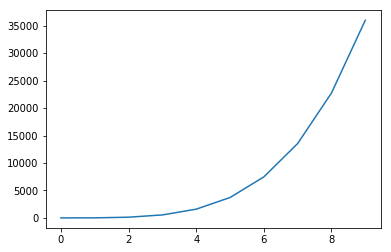

In [425]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(0, 9, 10)
coeffs = [1, 2, 3, 4, 5]
pyplot.plot(x, PolyCoefficients(x, coeffs))
pyplot.show()

In [426]:
print(x)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [427]:
import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable

train_data = torch.Tensor([
   [40,  6,  4],
   [44, 10,  4],
   [46, 12,  5],
   [48, 14,  7],
   [52, 16,  9],
   [58, 18, 12],
   [60, 22, 14],
   [68, 24, 20],
   [74, 26, 21],
   [80, 32, 24]])
test_data = torch.Tensor([
    [6, 4],
    [10, 5],
    [4, 8]])

x_train = train_data[:,1:3]
y_train = train_data[:,0]

POLY_DEGREE = 4
input_size = 2
output_size = 1


def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)



def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result


def get_batch():
    """Builds a batch i.e. (x, f(x)) pair."""
    x = make_features(x_train)

    return Variable(x), Variable(y_train)


# Define model
fc = torch.nn.Linear(input_size, output_size)

for batch_idx in range(1000):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.data[0]

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1), fc.bias.data))
# print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

In [434]:
print(1e-5)

1e-05


In [ ]:
tensor([[ 1.8325],
        [-8.9395],
        [ 8.9359]])
torch.Size([3, 1])
80623
80623
0.03800293

In [435]:
True == True

True

In [440]:
def checkReg(reg=False):
    if reg:
        print(5)

In [441]:
checkReg()

In [ ]:
Training Error : 0.09437 	 Testing Error : 0.14409 	 Bias : 0.11768

In [443]:
import torch.nn as nn

In [ ]:
super(LrModule, self).__init__()
        # handle degree 0 case
        if d == 0: d = 1
        self.linear = nn.Linear(d,1)

In [446]:
class PReg(nn.Module):
    def __init__(self,d):
        super().__init__()
        self.linear = nn.Linear(d, 1) 
        
    def forward(self,X):
        Ybar = self.linear(X)
        return Ybar

In [447]:
lr = PReg(19)

In [448]:
print(lr)

PReg(
  (linear): Linear(in_features=19, out_features=1, bias=True)
)


In [449]:
3e-1

0.3

In [ ]:
Combination : [2, 0, 0.01] 	 Training Error : 0.27543535828590393 	 Testing Error : 0.8357973694801331 	 Bias : 0.5113434791564941
Combination : [2, 0, 0.1] 	 Training Error : 0.2658443748950958 	 Testing Error : 0.7938412427902222 	 Bias : 0.5086975693702698
Combination : [2, 0, 1] 	 Training Error : 0.8409621715545654 	 Testing Error : 2.4264109134674072 	 Bias : 1.5623778104782104
Combination : [2, 1, 0.01] 	 Training Error : 0.0002282893838128075 	 Testing Error : 2.2762134075164795 	 Bias : 0.7669061422348022
Combination : [2, 1, 0.1] 	 Training Error : 0.0005742012872360647 	 Testing Error : 2.455548048019409 	 Bias : 0.9120669960975647
Combination : [2, 1, 1] 	 Training Error : 0.15684331953525543 	 Testing Error : 14.360038757324219 	 Bias : 1.9285402297973633
Combination : [2, 2, 0.01] 	 Training Error : 0.0002634990669321269 	 Testing Error : 2.3674046993255615 	 Bias : 0.8214757442474365
Combination : [2, 2, 0.1] 	 Training Error : 8.072011951298919e-06 	 Testing Error : 2.7617104053497314 	 Bias : 0.8516261577606201
Combination : [2, 2, 1] 	 Training Error : 0.025817932561039925 	 Testing Error : 16.200529098510742 	 Bias : 1.7536776065826416
Combination : [2, 3, 0.01] 	 Training Error : 6.020594810252078e-06 	 Testing Error : 2.2847957611083984 	 Bias : 0.9269736409187317
Combination : [2, 3, 0.1] 	 Training Error : 0.000871309544891119 	 Testing Error : 2.5896987915039062 	 Bias : 1.0508630275726318
Combination : [2, 3, 1] 	 Training Error : 0.006033551879227161 	 Testing Error : 7.0246734619140625 	 Bias : 1.7427277565002441
Combination : [2, 4, 0.01] 	 Training Error : 0.00014551327330991626 	 Testing Error : 2.8424301147460938 	 Bias : 0.9572417140007019
Combination : [2, 4, 0.1] 	 Training Error : 0.0009432813385501504 	 Testing Error : 2.786477565765381 	 Bias : 1.056684136390686
Combination : [2, 4, 1] 	 Training Error : 0.002988298423588276 	 Testing Error : 31.421947479248047 	 Bias : 2.011925220489502
Combination : [2, 5, 0.01] 	 Training Error : 2.695010152820032e-05 	 Testing Error : 2.061913013458252 	 Bias : 0.8461853265762329
Combination : [2, 5, 0.1] 	 Training Error : 0.00012494537804741412 	 Testing Error : 2.449063777923584 	 Bias : 0.6907252073287964
Combination : [2, 5, 1] 	 Training Error : 0.002969895489513874 	 Testing Error : 25.896865844726562 	 Bias : 2.1489193439483643
Combination : [2, 6, 0.01] 	 Training Error : 4.9053156544687226e-05 	 Testing Error : 2.3982815742492676 	 Bias : 1.2571673393249512
Combination : [2, 6, 0.1] 	 Training Error : 0.0002968028129544109 	 Testing Error : 1.663123607635498 	 Bias : 0.47058966755867004
Combination : [2, 6, 1] 	 Training Error : 0.015831634402275085 	 Testing Error : 19.754831314086914 	 Bias : 1.5748144388198853
Combination : [2, 7, 0.01] 	 Training Error : 0.00015456514665856957 	 Testing Error : 1.4248723983764648 	 Bias : 0.37884044647216797
Combination : [2, 7, 0.1] 	 Training Error : 0.0001971367746591568 	 Testing Error : 1.7252596616744995 	 Bias : 0.573484480381012
Combination : [2, 7, 1] 	 Training Error : 0.0008390448638238013 	 Testing Error : 25.877704620361328 	 Bias : 1.4131643772125244
Combination : [2, 8, 0.01] 	 Training Error : 0.00012491723464336246 	 Testing Error : 1.3648737668991089 	 Bias : 0.4373938739299774
Combination : [2, 8, 0.1] 	 Training Error : 0.00033116363920271397 	 Testing Error : 3.395367383956909 	 Bias : nan
Combination : [2, 8, 1] 	 Training Error : 0.037712618708610535 	 Testing Error : 18.01871681213379 	 Bias : 1.4701292514801025
Combination : [2, 9, 0.01] 	 Training Error : 3.0427884173457575e+24 	 Testing Error : 1.1130608288521341e+24 	 Bias : 2.3674720679544828e+22
Combination : [2, 9, 0.1] 	 Training Error : 0.00027264899108558893 	 Testing Error : 2.0299854278564453 	 Bias : nan
Combination : [2, 9, 1] 	 Training Error : 134834.890625 	 Testing Error : 101446.1875 	 Bias : 2143.748779296875
Combination : [2, 10, 0.01] 	 Training Error : 9.134004940515283e+26 	 Testing Error : 7.944434920522315e+26 	 Bias : 1.7026069231794315e+25
Combination : [2, 10, 0.1] 	 Training Error : 0.0001223546132678166 	 Testing Error : 2.24362850189209 	 Bias : 0.4329245090484619
Combination : [2, 10, 1] 	 Training Error : inf 	 Testing Error : inf 	 Bias : 2.0150629400941695e+35
Combination : [2, 11, 0.01] 	 Training Error : 3.693173857755028e-05 	 Testing Error : 1.6200364828109741 	 Bias : 0.34369727969169617
Combination : [2, 11, 0.1] 	 Training Error : 4.5872217015130445e-05 	 Testing Error : 1.8513725996017456 	 Bias : 0.480142205953598
Combination : [2, 11, 1] 	 Training Error : 0.03324945643544197 	 Testing Error : 22.86661720275879 	 Bias : 1.3431227207183838
Combination : [2, 12, 0.01] 	 Training Error : 2.9807756618538406e-06 	 Testing Error : 1.1795129776000977 	 Bias : 0.3207702338695526
Combination : [2, 12, 0.1] 	 Training Error : 0.000192186824278906 	 Testing Error : 1.569845199584961 	 Bias : 0.3474133014678955
Combination : [2, 12, 1] 	 Training Error : 0.00365641200914979 	 Testing Error : 26.07671546936035 	 Bias : 1.8738210201263428
Combination : [2, 13, 0.01] 	 Training Error : 3.984002614743076e-05 	 Testing Error : 1.760117530822754 	 Bias : 0.359337717294693
Combination : [2, 13, 0.1] 	 Training Error : 8.847319259075448e-05 	 Testing Error : 1.7088972330093384 	 Bias : 0.5490542054176331
Combination : [2, 13, 1] 	 Training Error : 0.045493435114622116 	 Testing Error : 18.693647384643555 	 Bias : 1.332298994064331
Combination : [2, 14, 0.01] 	 Training Error : 0.00010623306297929958 	 Testing Error : 1.3266843557357788 	 Bias : 0.3316033184528351